In [1]:
%cd /home/joe/hack104-rec
import xgboost as xgb
from carriage import Stream, StreamTable, Row, X
from sklearn.datasets import load_svmlight_file
from pathlib import Path
import numpy as np

/home/joe/hack104-rec


In [3]:
!tree data

data
├── category
│   ├── department.csv
│   ├── district.csv
│   ├── industry.csv
│   └── job_category.csv
├── company.json
├── job.json
├── testset-click.json
├── train-action.json
├── train-click.json
└── train-click.json.s

1 directory, 10 files


# xgboost test

In [3]:
%cat /home/joe/xgboost/demo/rank/mq2008.conf

# General Parameters, see comment for each definition

# specify objective
objective="rank:pairwise"

# Tree Booster Parameters
# step size shrinkage
eta = 0.1 
# minimum loss reduction required to make a further partition
gamma = 1.0 
# minimum sum of instance weight(hessian) needed in a child
min_child_weight = 0.1
# maximum depth of a tree
max_depth = 6

# Task parameters
# the number of round to do boosting
num_round = 4
# 0 means do not save any model except the final round model
save_period = 0 
# The path of training data
data = "mq2008.train" 
# The path of validation data, used to monitor training process, here [test] sets name of the validation set
eval[test] = "mq2008.vali" 
# The path of test data 
test:data = "mq2008.test"      




In [26]:
!head /home/joe/xgboost/demo/rank/mq2008.fold1.train

0 1:0.007477 3:1.000000 5:0.007470 11:0.471076 13:1.000000 15:0.477541 16:0.005120 18:0.571429 20:0.004806 21:0.768561 22:0.727734 23:0.716277 24:0.582061 29:0.780495 30:0.962382 31:0.999274 32:0.961524 37:0.797056 38:0.697327 39:0.721953 40:0.582568 46:0.007042
0 1:0.603738 3:1.000000 5:0.603175 13:0.122130 16:0.998377 17:0.375000 18:1.000000 20:0.998128 23:0.154578 24:0.555676 29:0.071711 39:0.117399 40:0.560607 42:0.280000 44:0.003708 45:0.333333 46:1.000000
0 1:0.214953 5:0.213819 11:0.401330 15:0.402388 16:0.140868 17:1.000000 18:0.285714 19:0.333333 20:0.141484 21:0.561349 22:0.771015 23:0.753872 24:1.000000 37:0.566409 38:0.760916 39:0.746370 40:1.000000 44:1.000000 45:1.000000 46:0.021127
0 3:1.000000 11:0.458053 13:0.495975 15:0.461687 18:0.571429 19:0.833333 21:0.273864 22:0.148498 29:0.387106 30:0.434598 31:0.165701 32:0.421555 37:0.320586 38:0.133604 41:0.250000 42:1.000000
0 1:1.000000 2:1.000000 5:1.000000 11:0.347234 12:0.583054 15:0.344586 16:1.000000 17:0.375000 18:0.7

In [45]:


X_train, y_train = load_svmlight_file('/home/joe/xgboost/demo/rank/mq2008.fold1.train')
X_train_group = Stream.read_txt('/home/joe/xgboost/demo/rank/mq2008.fold1.train.group').map(int).to_list()

X_test, y_test = load_svmlight_file('/home/joe/xgboost/demo/rank/mq2008.fold1.test')
X_test_group = Stream.read_txt('/home/joe/xgboost/demo/rank/mq2008.fold1.test.group').map(int).to_list()
y_test_random = np.random.randint(0, 3, y_test.shape)

dm_train = xgb.DMatrix(X_train, label=y_train)
dm_train.set_group(X_train_group)

dm_test = xgb.DMatrix(X_test, label=y_test)
dm_test_random_y = xgb.DMatrix(X_test, label=y_test_random)
dm_test.set_group(X_test_group)

In [46]:
display(np.unique(y_test, return_counts=True))
display(np.unique(y_test_random, return_counts=True))


(array([0., 1., 2.]), array([2319,  378,  177]))

(array([0, 1, 2]), array([989, 901, 984]))

In [21]:
xgb_param = Row(
    objective='rank:pairwise', 
    eta=0.1,
    gamma = 1.0 ,
    min_child_weight = 0.1,
    max_depth=6,
#    num_round = 4,
    save_period = 0
)

In [57]:
%matplotlib inline

[0]	test-map:0.746203	test_random-map:0.649442
[1]	test-map:0.767757	test_random-map:0.651721
[2]	test-map:0.750287	test_random-map:0.649885
[3]	test-map:0.764587	test_random-map:0.651295
[4]	test-map:0.761766	test_random-map:0.650757
[5]	test-map:0.773022	test_random-map:0.647451
[6]	test-map:0.766835	test_random-map:0.64763
[7]	test-map:0.768112	test_random-map:0.648702
[8]	test-map:0.76643	test_random-map:0.650714
[9]	test-map:0.769091	test_random-map:0.651413
[10]	test-map:0.763669	test_random-map:0.651943
[11]	test-map:0.761221	test_random-map:0.652654
[12]	test-map:0.766286	test_random-map:0.651939
[13]	test-map:0.764585	test_random-map:0.651918
[14]	test-map:0.758228	test_random-map:0.652413
[15]	test-map:0.756372	test_random-map:0.653205
[16]	test-map:0.755288	test_random-map:0.652642
[17]	test-map:0.75924	test_random-map:0.652969
[18]	test-map:0.762127	test_random-map:0.653526
[19]	test-map:0.760431	test_random-map:0.653674


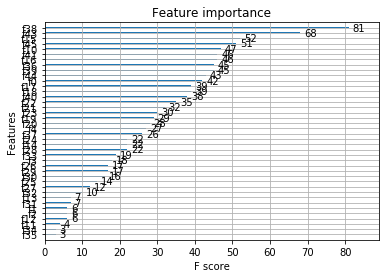

In [58]:
booster = xgb.train(
    params=xgb_param.to_dict(), 
    dtrain=dm_train, 
    num_boost_round=20,
    evals=[Row(dm=dm_test, name='test'), 
           Row(dm=dm_test_random_y, name='test_random')])

xgb.plot_importance(booster)

In [49]:
print(booster.eval_set([Row(dm=dm_test, name='test'), Row(dm=dm_test_random_y, name='test_random')]))

[0]	test-map:0.769091	test_random-map:0.651413


# 104hack-rec

In [2]:
import carriage.repr
carriage.repr.short_repr.maxstring= 1000
carriage.repr.short_repr.maxother= 100
carriage.repr.short_repr.maxlist= 200
carriage.repr.short_repr.maxlong= 200

repr(Row(a=Row(**{str(i):i for i in range(100)})))

'Row(a=Row(0=0, 1=1, 2=2, 3=3, 4=4, 5=5, 6=6, 7=7, 8=8,... 93=93, 94=94, 95=95, 96=96, 97=97, 98=98, 99=99))'

In [3]:
StreamTable.read_jsonl('data/train-click.json')

jobno,date,action,source,joblist,querystring
5314432,1527330445000,clickJob,web,"['5314432', '3494303', '3859882', '4439691', '7416542', '7484247', '9063545', '8318922', '9431734', '9127494', '9904656', '9926223', '9950320', '10079727', '10378122', '6830159', '6856925', '10343328', '9730978', '8510715']",ro=0&jobcat=2005003003%2C2005003002%2C2005003005&kwop=7&keyword=%E6%97%A5%E6%96%87&area=6001001000%2C6001005000&order=1&asc=0&mode=s&jobsource=n104bank1
9752404,1526025665000,clickJob,web,"['9661707', '10206086', '9752402', '9752404', '6572519', '6616990', '6884082', '8210542', '8210560', '9285450', '6547843', '9056121', '10351973', '8996291', '10256515', '10179441', '9830381', '7526521', '10027791', '8284471']",ro=0&keyword=IOS&area=6001016000&order=1&asc=0&kwop=7&mode=s&jobsource=n104bank1
10390361,1526879339000,clickJob,web,"['9191097', '10390361', '5266077', '5266131', '10390453', '10358519', '10192704', '10357873', '10269272', '10060504', '9863087', '9908644', '9144675', '9907457', '9907469', '9912957', '9913258', '9914885', '9917002', '10108336']",ro=0&isnew=0&keyword=%E4%BD%9C%E6%A5%AD%E5%93%A1%20&area=6001002021&order=1&asc=0&kwop=7&mode=s&jobsource=n104bank1
9992847,1527057117000,clickJob,web,"['7965727', '9422549', '9992847', '6156210', '9577080', '5897368', '6182347', '6933301', '9421061', '7917971', '5198910', '8192435', '6927113', '9223446', '9223447', '7687567', '10162963', '6673462', '6156221', '6156201']",ro=0&keyword=BMW%20%E9%87%8D%E6%A9%9F&order=1&asc=0&kwop=7&mode=s&jobsource=n104bank1
10361154,1526353041000,clickJob,web,"['10361190', '7690768', '7363215', '10168154', '10361154', '10005498', '10207429', '8277824', '6850363', '8097885', '8662063', '10360736', '7893205', '7017885', '6721751', '7333071', '8061233', '8560730', '10154082', '10246962']",ro=1&isnew=7&keyword=%E6%94%BF%E5%BA%9C&area=6001001000%2C6001002000&order=2&asc=0&kwop=7&mode=s&jobsource=n104bank1
10322390,1525667305000,clickJob,web,"['7396086', '9998346', '9626448', '10046483', '10021842', '9524805', '6816238', '9051549', '7539385', '10168821', '9144156', '10257015', '7397397', '8923134', '10174836', '10322390', '10166774', '8939796', '8940114', '10055014']",ro=0&isnew=7&keyword=%E6%97%A5%E6%96%87&area=6001012000&order=1&asc=0&kwop=7&mode=s&jobsource=n104bank1
9490099,1527161401000,clickJob,web,"['7192202', '7135403', '10079134', '7221115', '10168788', '9088354', '10116380', '10404977', '9490099', '4245754', '9954849', '10245609', '9087438', '10348000', '8351655', '9122308', '8830743', '8849778', '10227940', '9330945']",ro=0&keyword=%E5%9F%B7%E8%A1%8C%E8%A3%BD%E4%BD%9C&area=6001001000%2C6001002000&order=1&asc=0&mode=s&jobsource=n104bank1
8814799,1525867264000,clickJob,web,"['7205987', '9566727', '9394777', '10041476', '7781552', '9752196', '9189491', '9712362', '8814799', '10147479', '8989710', '9703614', '8464836', '9951369', '8492509', '8269377', '10340847', '10124385', '9410636', '10031498']",ro=1&jobcat=2007000000%2C2008000000%2C2018002001&keyword=SAP&area=6001002000%2C6001001000&order=2&asc=0&kwop=7&mode=s&jobsource=n104bank1
9603745,1526880193000,clickJob,web,"['8657143', '5736256', '5736276', '5736291', '5736292', '7172317', '7172339', '8274588', '10031662', '4801867', '9304814', '10114729', '10161594', '7515029', '9603745', '10212282', '10283527', '10283528', '10283529', '10283531']",ro=1&keyword=%E5%9B%BA%E5%AE%9A%E6%97%A5%E7%8F%AD&area=6001016000&order=1&asc=0&kwop=7&mode=s&jobsource=n104bank1
5637237,1527671458000,clickJob,web,"['10403672', '8996809', '5860598', '5829919', '10150005', '7015147', '7776454', '9645651', '10430834', '5637237', '6591773', '9732298', '4918850', '5654517', '10363414', '8382910', '10383181', '9564247', '5756397', '8831730']",ro=0&jobcat=2002000000%2C2011000000%2C2005004000%2C2001000000&keyword=%E5%8A%A9%E7%90%86&area=6001016009%2C6001016011%2C6001016013%2C6001016012%2C6001016005&order=2&asc=0&s5=0&wktm=1&wf=1&mode=s&jobsource=n104bank1


In [1]:
%%time
import urllib

(
    StreamTable.read_jsonl('data/train-click.json')
    .map_fields(
        querystring=lambda row: Row.from_dict(dict(urllib.parse.parse_qsl(row.querystring)))
    )
    .explode('joblist')
    .where(lambda row: 'keyword' in row.querystring.fields())
    .select('joblist', 
            keyword=lambda row:
                    row.querystring.get_opt('keyword').get_or(''))
    .value_counts()
    .to_stream()
    .map(lambda row: Row(
        keyword=row.key.keyword,
        jobno=row.key.joblist, 
        impression=row.value
    ))
    .to_streamtable()
    .write_jsonl('data/train-impression.jsonl')
)

NameError: name 'StreamTable' is not defined

In [63]:
!wc -l data/train-impression.jsonl

3704755 data/train-impression.jsonl


In [64]:
!du -h data/train-impression.jsonl

255M	data/train-impression.jsonl


In [47]:
stb = (
    StreamTable.read_jsonl('data/train-click.json')
    .map_fields(
        querystring=lambda row: Row.from_dict(dict(urllib.parse.parse_qsl(row.querystring)))
    )
    .where(lambda row: 'keyword' not in row.querystring.fields())
    .take(10)
    .cache()
)

In [50]:
stb

jobno,date,action,source,joblist,querystring
10399843,1527003572000,clickJob,web,"['10399943', '8545079', '10346189', '10399843', '10399768', '9080221', '10399739', '10399735', '10399732', '5742184', '5742188', '10399728', '10399720', '10399718', '10399713', '10399712', '10399711', '10334545', '10306889', '10307040']","Row(area='6001005000', jobsource='n104bank1', ro='0', utm_expid='.vCo_medgQLiOEryyaNMYbw.0', utm_referrer='https://www.104.com.tw/jobs/search/?ro=1&isnew=0&keyword=%E4%BA%BA%E8%B3%87&area=6001005000&order=1&asc=0&kwop=7&page=1&wf=1&mode=s&jobsource=104_bank1')"
10322427,1525418136000,clickJob,web,"['10322428', '7484975', '10322427', '10322424', '9011530', '10178386', '10228314', '10027192', '9965605', '5067855', '10130179', '10078371', '10283888', '9714570', '10261983', '6583036', '9184149', '6562771', '7133312', '10322420']","Row(jobsource='n104bank1', ro='0', area='6001001000,6001002020', order='2', asc='0', wktm='週休二日', utm_expid='.It_n6NbFSneqd1b98TC4ow.0', utm_referrer='https://www.104.com.tw/jobbank/joblist/joblist.cfm?jobsource=n104bank1&ro=0&keyword=%E9%81%8A%E6%88%B2&area=6001001000%2C6001002020&order=2&asc=0&wktm=%E9%80%B1%E4%BC%91%E4%BA%8C%E6%97%A5&page=1')"


In [42]:
class lazy(object): 
    def __init__(self, func): 
        self.func = func 
    
    def __get__(self, instance, cls): 
        val = self.func(instance) 
        setattr(instance, self.func.__name__, val) 
        return val 
    

In [43]:
a = lazy(lambda: 3)

In [44]:
a